<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-assignments/blob/main/m2/assignment-8/M2_AST_08_Unsupervised_Learning_Techniques_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 8: Unsupervised Learning Techniques

## Learning Objectives

At the end of the experiment, you will be able to

* understand what is Unsupervised Learning
* know different types of Unsupervised Learning techniques
* perform Clustering (k-means, dbscan)
* understand what are Gaussian Mixtures

In [1]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn-exec.ap-south-1.linodeobjects.com/content/Unsupervised_Learning.mp4">
</video>""")

### Introduction

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets without human intervention, in contrast to supervised learning where labels are provided along with the data.

Some of the unsupervised learning tasks include:

* **Clustering:** The goal is to group similar instances together into clusters. It is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

* **Anomaly detection:** The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

* **Density estimation:** This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

First we will start with clustering, using k-means and DBSCAN, and then we will discuss Gaussian mixture models and see how they can be used for density estimation, clustering, and anomaly detection.

### Setup Steps:

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418709" #@param {type:"string"}

In [3]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9902028293" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_08_Unsupervised_Learning_Techniques_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install yellowbrick")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Images/flowers.jpg")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### K-Means

The k-means algorithm is a simple algorithm capable of clustering very quickly and efficiently, often in just a few iterations.

A **cluster** refers to a collection of data points aggregated together because of certain similarities.

Here we need to define a target number k, which refers to the number of centroids we need in the dataset. A **centroid** is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the k-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

Let's see how k-means clusters the species present in Iris dataset.

In [6]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
X = StandardScaler().fit_transform(X)

In [7]:
X.shape

(150, 4)

In [8]:
# X

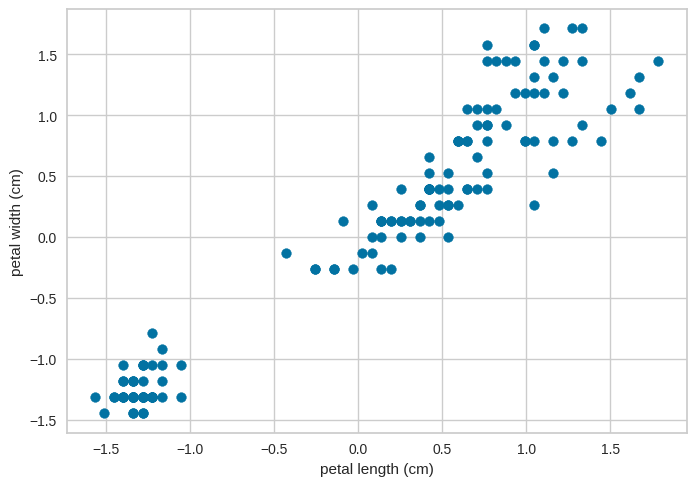

In [9]:
# Visualize the data using two features
plt.scatter(X[:,2], X[:,3])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

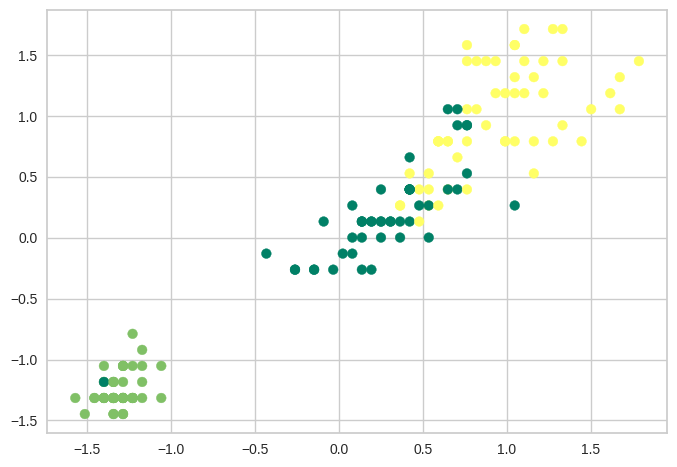

In [10]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=1)
y_predict = kmeans.fit_predict(X)
plt.scatter(X[:,2], X[:,3], c=y_predict, cmap = 'summer')
plt.show()

In [11]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

From the above plot, we can see that only by specifying the number of clusters k-means identifies them within the dataset.

Now let's see how the k-means algorithm works.

#### Working of k-means algorithm

It starts by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances and update the centroids, then again label the instances and update the centroids, and so on until the centroids stop moving. The algorithm converges in a finite number of steps.

In order to update the label of instances, k-means computes the distance of each instance from every cluster and assigns the one which is closest to them. Also, each centroid  is updated to the mean of all instances assigned to that cluster as shown in the figure below.
<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Kmeans_cluster_update.JPG" width=650/>
</center>

The algorithm halts creating and optimizing clusters when either:

* The centroids have stabilized — there is no change in their values because the clustering has been successful.
* The defined number of iterations has been achieved.

#### Centroid initialization methods

If we happen to know approximately where the centroids should be, then we can set the `init` hyperparameter to a NumPy array containing the list of centroids, and set number of iteration (`n_init`) to 1:

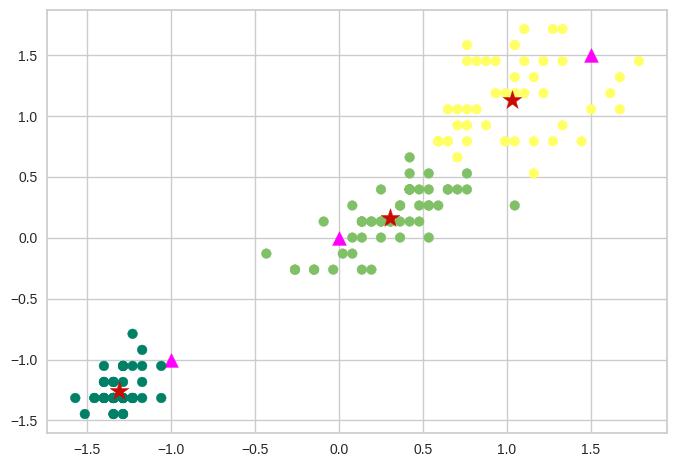

In [12]:
# Perform k-means clustering with specified centroids
good_init = np.array([[-1, -1], [0, 0], [1.5, 1.5]])
kmeans = KMeans(n_clusters = 3, init = good_init, n_init = 1, random_state = 1)
# Make prediction using only two features, as centroids are specified for only two features
y_predict = kmeans.fit_predict(X[:,2:])

# Plot initial centroids
plt.scatter(x = [-1, 0, 1.5], y = [-1, 0, 1.5], c = 'magenta', s = 100, marker= "^")
# Plot data points
plt.scatter(X[:,2], X[:,3], c = y_predict, cmap = 'summer')
# Plot centroids after iteration
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], c = 'r', marker="*", s = 200)
plt.show()

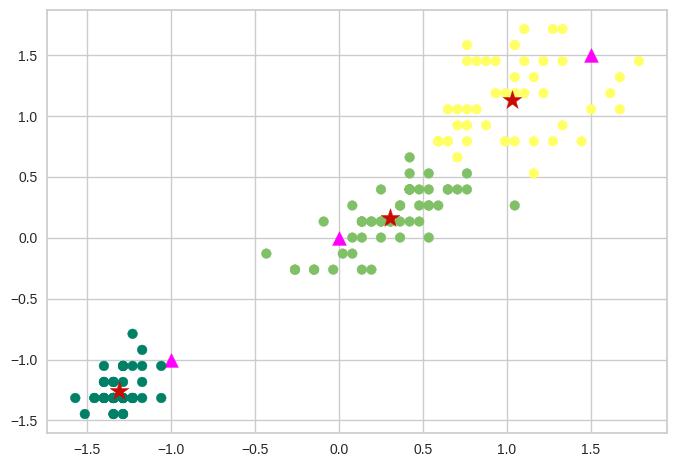

In [13]:
# I have changed the n_init value to 10 below

kmeans2 = KMeans(n_clusters = 3, init = good_init, n_init = 10, random_state = 1)
# Make prediction using only two features, as centroids are specified for only two features
y_predict2 = kmeans2.fit_predict(X[:,2:])

# Plot initial centroids
plt.scatter(x = [-1, 0, 1.5], y = [-1, 0, 1.5], c = 'magenta', s = 100, marker= "^")
# Plot data points
plt.scatter(X[:,2], X[:,3], c = y_predict2, cmap = 'summer')
# Plot centroids after iteration
plt.scatter(x = kmeans2.cluster_centers_[:,0], y = kmeans2.cluster_centers_[:,1], c = 'r', marker="*", s = 200)
plt.show()

From the above plot, we can see the initial centroids in magenta triangle and centroids after k-means in red star. So by specifying the centroids initially we can reduce the number of iterations required. By default it uses 10, which means that the whole algorithm runs 10 times when we call fit(), and Scikit-Learn keeps the best solution.

It knows which solution is the best by using a performance metric called the model’s **inertia**, which is the mean squared distance between each instance and its closest centroid. The `KMeans` class runs the algorithm `n_init` times and keeps the model with the **lowest inertia**.

We can access a model's inertia via the `inertia_` instance variable:

In [14]:
# Model's inertia
kmeans.inertia_

18.026962612544075

An important improvement to the k-means algorithm, **K-Means++**, was proposed in
a 2006 paper by David Arthur and Sergei Vassilvitskii. They introduced a smarter
initialization step that tends to select centroids that are distant from one another, and this improvement makes the k-means algorithm much less likely to converge to a suboptimal solution.

The K-Means++ initialization algorithm is as follow:

1. Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset.

2. Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2/ \sum_{j=1}^{m}D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely be selected as centroids.

3. Repeat the previous step until all k centroids have been chosen.

The `KMeans` class uses this initialization method by default. If we want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then we can set the `init="random"` but we will rarely need to do this.

Till now we are specifying the number of clusters because we know there are three species in Iris dataset. But what to do when we don't know how many clusters the dataset contains or it is hard to identify even with visualization.

Let's see how we find optimal number of clusters then.

#### Finding the optimal number of clusters

The inertia is not a good performance metric when trying to choose $k$ because it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

Let’s plot the inertia as a function of $k$

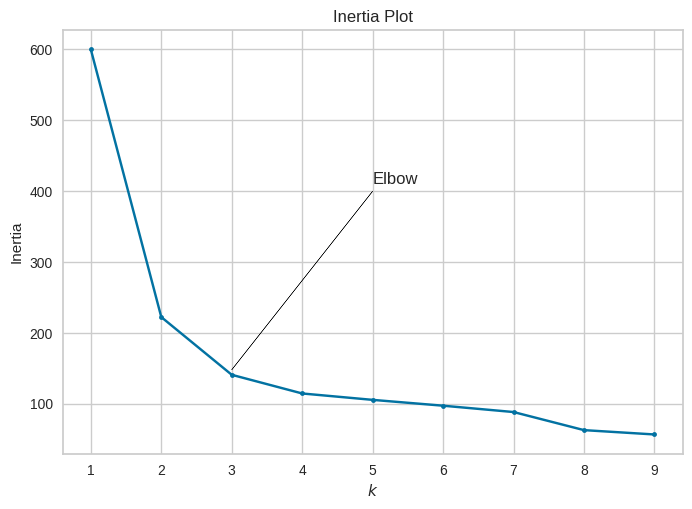

In [15]:
# Plot inertia by varying number of clusters
clusters = np.arange(1,10)
inertia = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(X, y)
    inertia.append(kmeans.inertia_)
plt.plot(clusters, inertia, marker= '.')
plt.arrow(5, 400, -2, -252)
plt.text(5, 410, "Elbow", fontdict={'size': 12})
plt.title('Inertia Plot')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

From the above plot we can see, the inertia drops very quickly as we increase $k$ up to 3, but then it decreases much more slowly as we keep increasing $k$. This curve has roughly the shape of an arm, and there is an **“elbow”** at $k = 3$. So, if we did not know better, $3$ would be a good choice.

This technique for choosing the best value for the number of clusters is rather coarse. A **more precise approach** but also more computationally expensive is to use the **silhouette score**, which is the mean silhouette coefficient over all the instances.

An instance’s silhouette coefficient is given by $$Sil(x_1) = \frac{(b – a)}{max(a, b)}$$ where,

$a$ is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance), and

$b$ is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$, excluding the instance’s own cluster) as shown in the figure below.

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Silhouette_coefficient.png" width= 500 px/>
</center>

The silhouette coefficient can vary between $–1$ and $+1$ as follows:

* close to $+1$ means that the instance is well inside its own cluster and far from other clusters,
* close to $0$ means that it is close to a cluster boundary, and  
* close to $–1$ means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, we can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned:


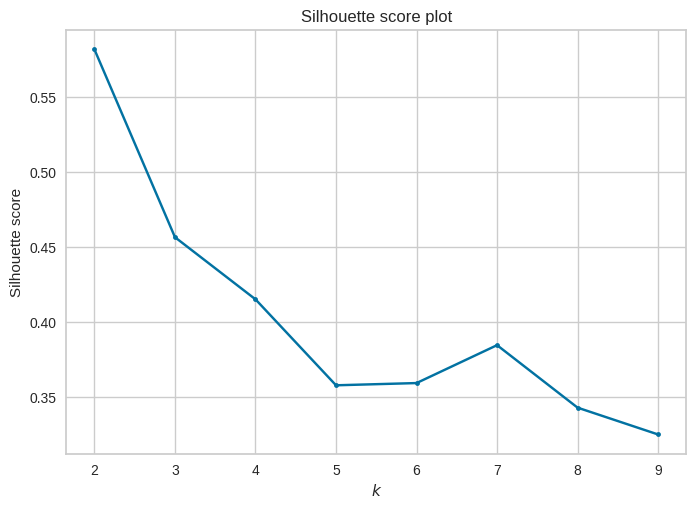

In [16]:
# Plot Silhouette score plot

clusters = np.arange(2,10)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(X, y)
    sil_score.append(silhouette_score(X, kmeans.labels_))
plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

As we can see, the above visualization is much richer than the previous one: although it shows that $k = 2$ is a good choice, it also underlines the fact that $k = 3$ is quite good as well and much better than $k = 4$ or $5$. This was not visible when comparing inertias.

An even more informative visualization is obtained when we plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a **silhouette diagram**.

Diagram contains:
* one knife shape per cluster
* the shape’s height indicates the number of instances the cluster contains, and
* its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

The dashed line indicates the mean silhouette coefficient.

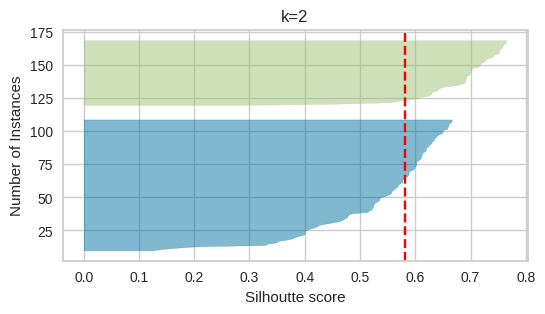

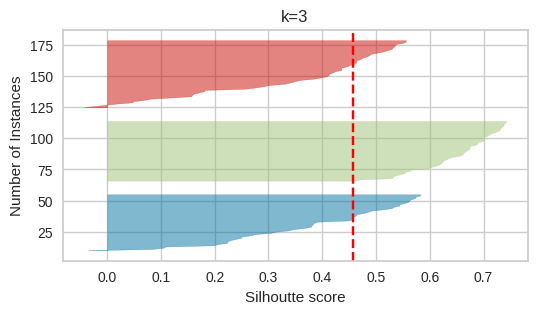

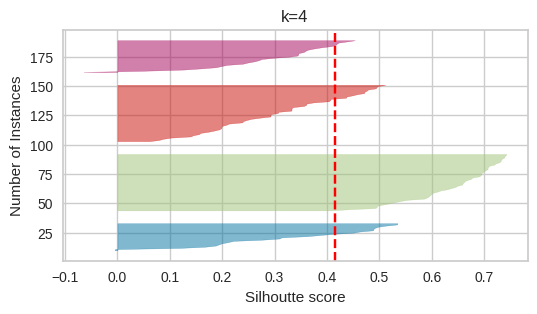

In [17]:
# Plot Silhouette Diagram

clusters = [2, 3, 4]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(X);
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

In the above plots, the vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.

We can see that when k = 2 or k = 3, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When $k = 2$, the cluster at index $0$ is rather big. When $k = 3$, all clusters have similar sizes. So, even though the overall silhouette score from $k = 2$ is slightly greater than for $k = 3$, it seems like a good choice to use $k = 3$ to get clusters of similar sizes.

Now let’s look at a few ways we can benefit from k-means clustering.

#### Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments.

Here, we are going to do **color segmentation**. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient. For example, if we want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

Let's performs color segmentation on the flowers image:

(194, 260, 3)

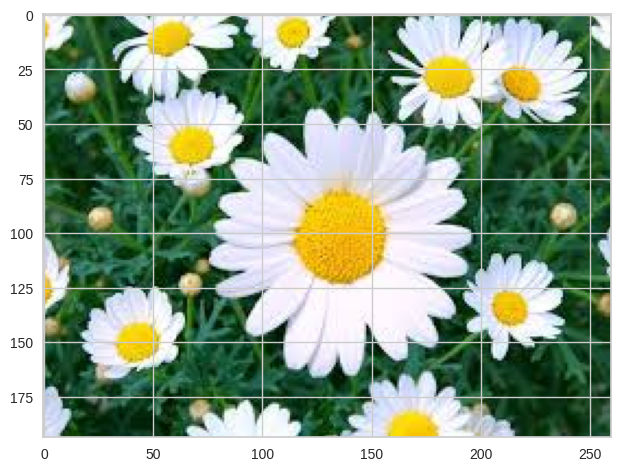

In [18]:
# Import flowers image
img = image.imread("flowers.jpg")
# Noremalize its pixel value
img = img / 255
plt.imshow(img)
img.shape

In [19]:
img

array([[[0.95294118, 0.93333333, 1.        ],
        [1.        , 0.98823529, 1.        ],
        [0.98823529, 0.98039216, 1.        ],
        ...,
        [0.94901961, 0.94509804, 0.96470588],
        [0.96862745, 0.96470588, 0.98431373],
        [0.99215686, 0.98823529, 1.        ]],

       [[0.99215686, 0.96470588, 0.99215686],
        [1.        , 0.99215686, 1.        ],
        [0.96078431, 0.95294118, 0.97254902],
        ...,
        [0.91764706, 0.91372549, 0.93333333],
        [0.9372549 , 0.93333333, 0.95294118],
        [0.95686275, 0.95294118, 0.97254902]],

       [[0.98823529, 0.94509804, 0.82745098],
        [1.        , 0.98431373, 0.88235294],
        [0.98431373, 0.95686275, 0.91764706],
        ...,
        [0.9254902 , 0.9254902 , 0.93333333],
        [0.9254902 , 0.9254902 , 0.93333333],
        [0.93333333, 0.93333333, 0.94117647]],

       ...,

       [[0.82745098, 0.85098039, 0.89803922],
        [0.86666667, 0.89019608, 0.94509804],
        [0.89803922, 0

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB).

For segmentation,

* First, it identify a color cluster for all shades of that color.

* Next, for each color, it looks for the mean color of the pixel’s color cluster. For example, all shades of green may be replaced with the same green color.

* Finally, it reshapes this long list of colors to get the same shape as the original image.

The following code shows clustering using k-means:

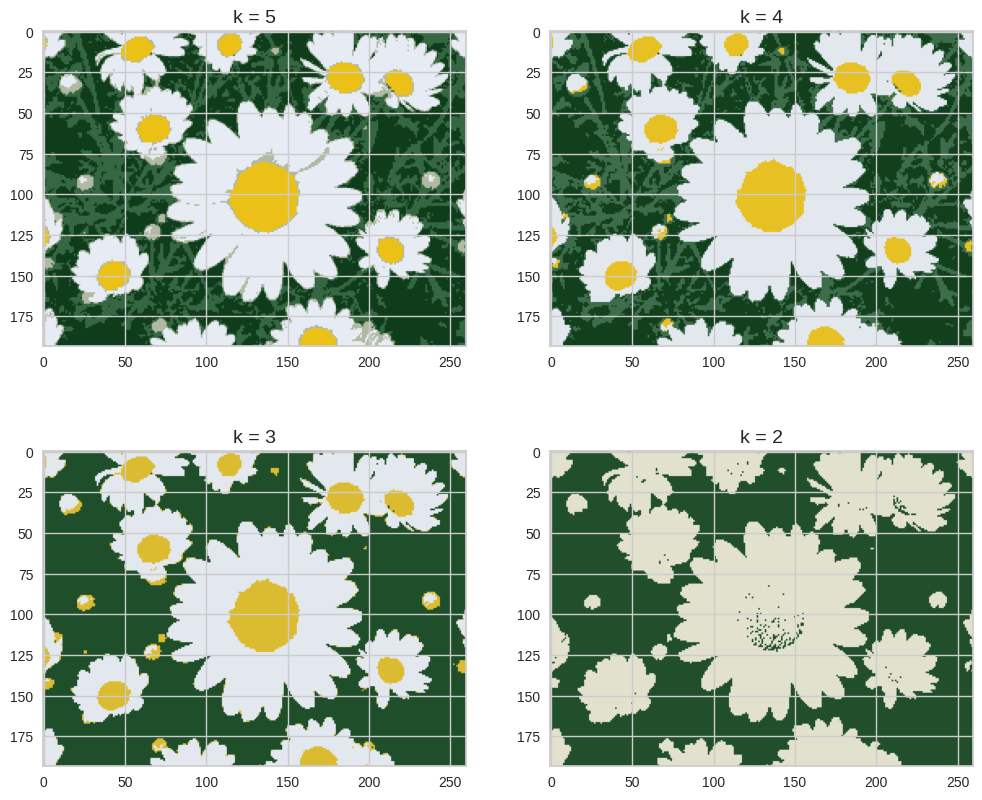

In [20]:
# Color segmentation for different number of clusters
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12,10))

X_ = img.reshape(-1, 3)
clusters = [2, 3, 4, 5]
for axi, c in zip([ax4, ax3, ax2, ax1], clusters):
    kmeans = KMeans(n_clusters = c)
    kmeans.fit(X_)
    # identify a color cluster
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(img.shape)
    axi.imshow(segmented_img)
    axi.set_title("k = {}".format(c), size=14)

When we use fewer than five clusters, notice that the bud's shinny color fails to get a cluster of its own: it gets merged with colors from the environment. This is because k-means prefer clusters of similar sizes. The buds are small, much smaller than the rest of the image, so even though its color is flashy, k-means fails to dedicate a cluster to it.

Now let’s look at another application of clustering: i.e, in Semi-Supervised Learning.

#### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning when we have plenty of unlabeled instances and very few labeled instances. Let’s train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9.

In [21]:
# Load the dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.25, random_state=123)

In [22]:
# Logistic regression on 50 random labeled instances
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8088888888888889

The accuracy is just 81.1%. It should come as no surprise that this is much lower than if we trained the model on the full training set.

In [23]:
# Logistic regression on full training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9644444444444444

In [24]:
# each picture is represented by 8x8 numbers.
print(len(X_train),len(X_train[0]))

1347 64


Let’s see how we can do better.

First, let’s cluster the training set into 50 clusters. Then for each cluster, let’s find the image closest to the centroid. We will call these images the representative images:


In [25]:
# Cluster the training instances

k = 50
kmeans = KMeans(n_clusters=k, random_state = 123)
# compute distances from each cluster
X_digits_dist = kmeans.fit_transform(X_train)
# get indices of images closest to their cluster
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# get the images corresponds to indices
X_representative_digits = X_train[representative_digit_idx]

Let’s look at each image and manually label it:

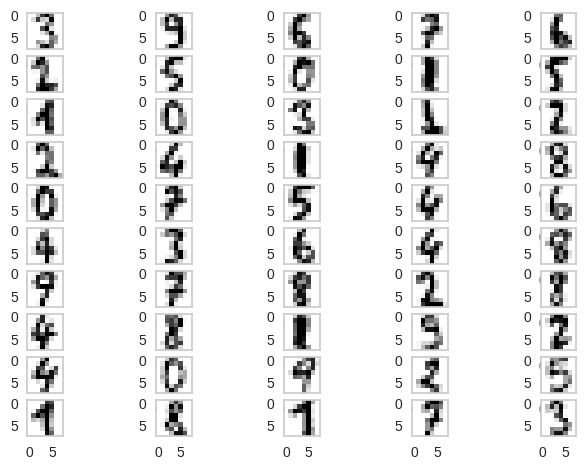

In [26]:
# Visualize representative images
fig, ax = plt.subplots(10,5)
for axi, i in zip(ax.ravel(), np.arange(0,50)):
    axi.imshow(X_representative_digits[i].reshape(8,8), cmap='Greys');
    axi.grid(False)

In [27]:
# Representative image labels
y_representative_digits = y_train[representative_digit_idx]
y_representative_digits

array([3, 9, 6, 7, 6, 2, 5, 0, 1, 5, 1, 0, 3, 1, 2, 2, 4, 1, 4, 8, 0, 7,
       5, 4, 6, 4, 3, 6, 4, 8, 9, 7, 8, 2, 8, 4, 8, 1, 9, 2, 4, 0, 9, 2,
       5, 1, 8, 1, 7, 3])

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of its cluster. Let’s see if the performance is any better:

In [28]:
# Logistic regression on 50 representative labeled instances
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9111111111111111

From the above results, we can see that accuracy jumped from 81.1% to 90%, although we are still only training the model on 50 instances.

Since it is often costly and painful to label instances, especially when it has to be done manually, it is a good idea to label representative instances rather than just random instances.

Also, we can go one step further: that is if we propagate the labels to all the other instances in the same cluster. This method is called **label propagation**.

In [29]:
# Propagate labels
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

Now let’s train the model again and look at its performance:

In [30]:
# Model after label propagation
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9422222222222222

From the above result, we can see that we got a reasonable accuracy boost from 90% to 91.5%.

Here we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled.

Let’s see what happens if we only propagate the labels to the 30% of the instances that are closest to the centroids:

In [31]:
# Propagate only to 30% closest instances

percentile_closest = 30
# distance to closest cluster for each instance
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    # threshold distance
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Now let’s train the model again on this partially propagated dataset:

In [32]:
# Model after label propagation to 30% closest instances
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9377777777777778

From the above results, we can see that with just 50 labeled instances (only 5 examples per class on average!), we got 91.7% accuracy, which is pretty close to the performance of Logistic Regression on the fully labeled digits dataset (which was 96%).

This good performance is due to the fact that the propagated labels are actually pretty good, their accuracy is very close to 99%, as shown in the following code:

In [33]:
# Accuracy of propagated labels w.r.t actual labels
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

Now, let’s take a look at DBSCAN, another popular clustering algorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes.

### DBSCAN (Density-based spatial clustering of applications with noise)

This algorithm defines clusters as continuous regions of high density. Here is how it works:

* For each instance, the algorithm counts how many instances are located within a small distance $ε$ (epsilon) from it. This region is called the instance’s $ε$-neighborhood.

* If an instance has at least `min_samples` instances in its $ε$-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.

* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions.

Let’s test it on the `moons` dataset:

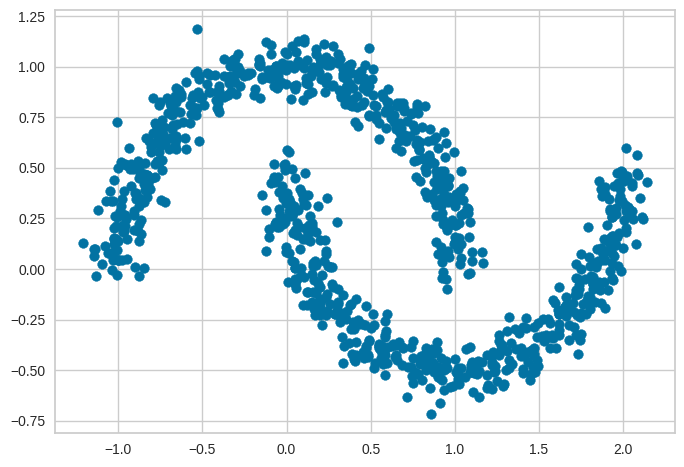

In [34]:
# Visualize data
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=0.07, random_state=1)
plt.scatter(X_moons[:,0], X_moons[:,1], cmap= "autumn")

The labels of all the instances can be access via the `labels_` instance variable.

In [35]:
# Perform DBSCAN on data
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X_moons)
print("Unique clusters in data: ", np.unique(dbscan.labels_))

Unique clusters in data:  [-1  0  1]


Notice that some instances have a cluster index equal to $–1$, which means that they are considered as **anomalies** by the algorithm.

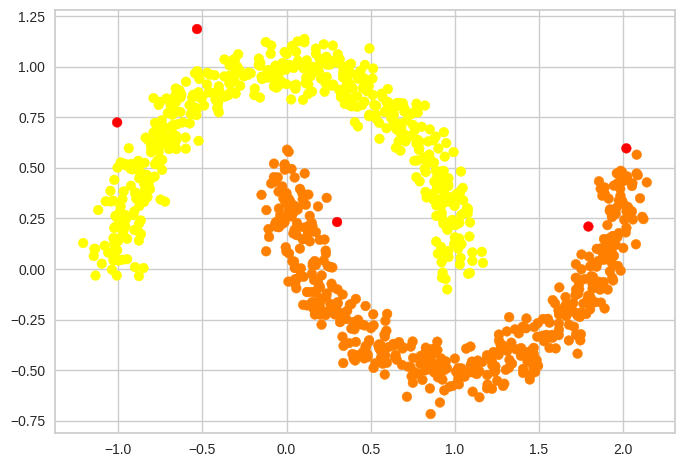

In [36]:
# Visualize data with DBSCAN labels
plt.scatter(X_moons[:,0], X_moons[:,1], c = dbscan.labels_, cmap= "autumn")

From the above plot, as we can see, it identified quite a lot of anomalies, plus two different clusters, which looks perfect.

The indices of the core instances are available in the `core_sample_indices_` instance variable, and the core instances themselves are available in the `components_` instance variable.

In [37]:
# Number of core instances their indices and position
num_of_core_instns = len(dbscan.core_sample_indices_)
print("Number of core instances: ", num_of_core_instns)

core_instns_indices = dbscan.core_sample_indices_
print("First 10 core instances indices: ", core_instns_indices[0:10])

core_instns = dbscan.components_
print("First 10 core instances: \n", core_instns[0:10])

Number of core instances:  973
First 10 core instances indices:  [ 0  1  2  3  4  5  6  7  9 10]
First 10 core instances: 
 [[ 0.09265036  0.37509504]
 [ 1.40558216 -0.51417142]
 [-0.88575515  0.18824291]
 [-0.68876666  0.80668479]
 [ 0.0316318   1.10179665]
 [ 1.84355084  0.09926668]
 [-0.01888625  0.98712515]
 [ 1.46879301 -0.3899634 ]
 [ 0.99819725  0.31113722]
 [-1.04276161  0.33324239]]


DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belongs to.

This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. For example, let’s train a `KNeighborsClassifier`:

In [38]:
# Training KNeighborsClassifier on core instances
knn = KNeighborsClassifier(n_neighbors = 50)
X_core = core_instns
y_core = dbscan.labels_[core_instns_indices]
knn.fit(X_core, y_core)

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which cluster they most likely belong to and even estimate a probability for each cluster:

Prediction:  [1 0 1 0]
Prediction probability: 
 [[0.28 0.72]
 [1.   0.  ]
 [0.3  0.7 ]
 [1.   0.  ]]


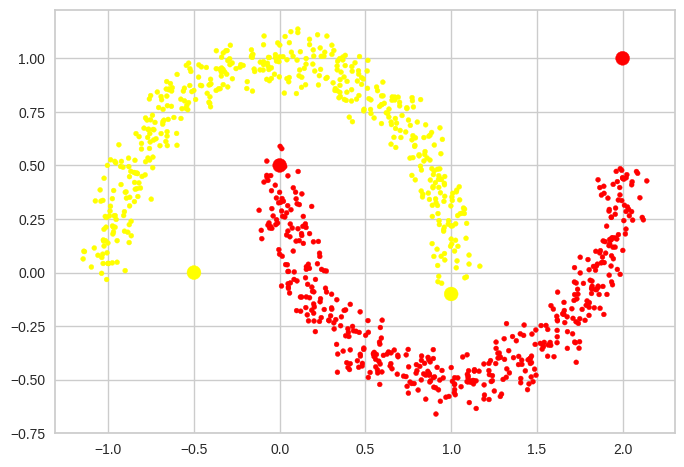

In [39]:
# Prediction on new instances
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
pred = knn.predict(X_new)
print("Prediction: ", pred)

pred_prob = knn.predict_proba(X_new)
print("Prediction probability: \n", pred_prob)

# Visualize prediction
plt.scatter(X_core[:,0], X_core[:,1], c = y_core, cmap= "autumn", marker = '.')
plt.scatter(x = [-0.5, 0, 1, 2], y = [0, 0.5, -0.1, 1], c = pred, cmap='autumn', s=100)

Notice that since there is no anomaly in the training set (only core instances used), the classifier always chooses a cluster, even when that cluster is far away.

It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies.

To do this, we have the `kneighbors()` method of the `KNeighborsClassifier`. Given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set:

In [40]:
# Distances and indices of k nearest neighbors
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = y_core[y_pred_idx]
# Introduce a maximum distance
y_pred[y_dist > 0.1] = -1
pred1 = y_pred.ravel()
pred1

array([-1,  0,  1, -1])

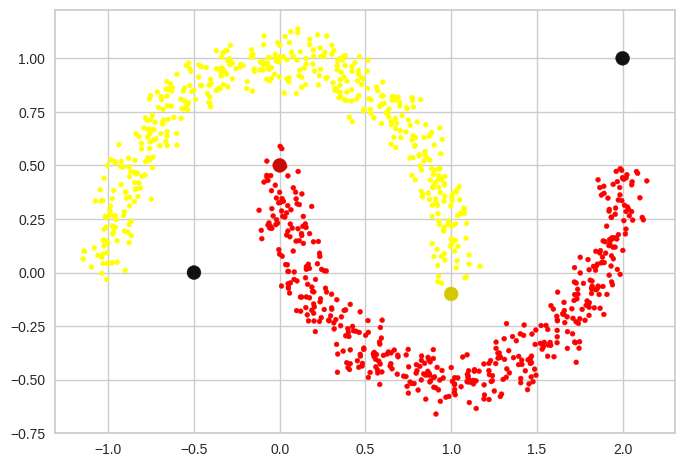

In [41]:
# Visualize prediction
plt.scatter(X_core[:,0], X_core[:,1], c = y_core, cmap= "autumn", marker = '.')
plt.scatter(x = [-0.5, 0, 1, 2], y = [0, 0.5, -0.1, 1], c = ['k', 'r', 'y', 'k'], s=100 )

From the above plot, it can be seen that two anomalies are separated out.

**Note that** we only trained the classifier (KNN) on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task the model is building for.

Now let’s dive into Gaussian mixture models, which can be used for density estimation, clustering, and anomaly detection.

### Gaussian Mixtures

A **Gaussian mixture model (GMM)** is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation.

There are several GMM variants. In the simplest variant, implemented in the `GaussianMixture` class, we must know in advance the number $k$ of Gaussian distributions.

Let's see the performance of GMM model on Iris dataset:

In [59]:
# Gaussian Mixture model
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

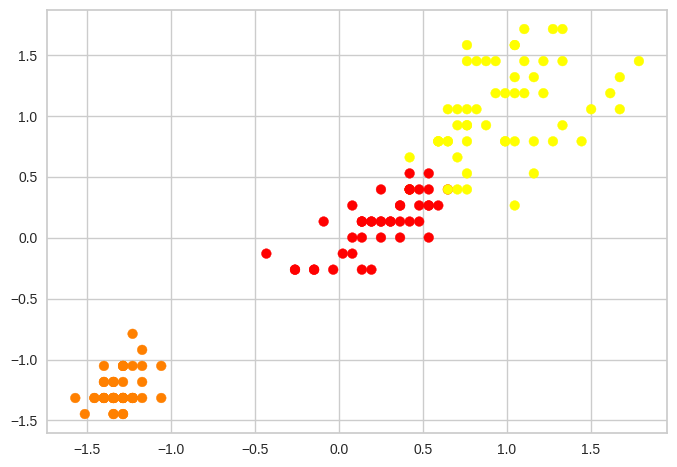

In [60]:
# Make prediction
predict = gm.predict(X)

# Visualize prediction labels
plt.scatter(X[:,2], X[:,3], c = predict, cmap= "autumn")

From the above plot, we can see that using GMM algorithm the labels are classified quite well.

Let’s look at the parameters that the algorithm estimated:

In [61]:
# Estimated weights, means, covariance matrices of clusters
print("Weights: ", gm.weights_)
print("Means: ", gm.means_)
print("Covariance matrices: \n", gm.covariances_)

Weights:  [0.30095123 0.33333333 0.36571544]
Means:  [[ 0.08890219 -0.64297712  0.25393414  0.13018296]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.85158495 -0.24859804  0.98047264  1.03665053]]
Covariance matrices: 
 [[[0.40444147 0.26962696 0.12762457 0.08726715]
  [0.26962696 0.49050585 0.11912704 0.13028962]
  [0.12762457 0.11912704 0.06527343 0.0460751 ]
  [0.08726715 0.13028962 0.0460751  0.05592973]]

 [[0.17877068 0.27120389 0.01103828 0.01614737]
  [0.27120389 0.74619275 0.01499926 0.02761055]
  [0.01103828 0.01499926 0.00954905 0.00445008]
  [0.01614737 0.02761055 0.00445008 0.01885974]]

 [[0.56868206 0.2572427  0.20829787 0.09724537]
  [0.2572427  0.58500486 0.10979199 0.16903018]
  [0.20829787 0.10979199 0.10536011 0.05462615]
  [0.09724537 0.16903018 0.05462615 0.14724193]]]


From the above results, the weights that were used to generate the data were $0.36, 0.33,$ and $0.30$.

Now, let's visualize the estimated means.

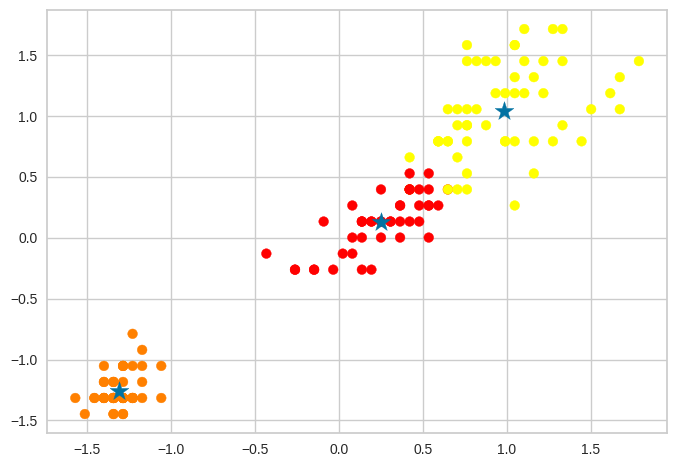

In [62]:
# Visualize means
plt.scatter(X[:,2], X[:,3], c = predict, cmap= "autumn")
plt.scatter(gm.means_[:,2], gm.means_[:,3], marker="*", s=200)

We can check whether or not the algorithm converged and how many iterations it
took:

In [64]:
# Algorithm convergence and number of iterations
print("Algorithm converged: ", gm.converged_)
print("Number of EM iterations used: ", gm.n_iter_)

Algorithm converged:  True
Number of EM iterations used:  19


Now let's see how GMM works for outlier detection.

#### Anomaly Detection Using Gaussian Mixtures

Using a GMM for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. We must define what density threshold we want to use.

For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. We then set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density.

Also,

* If we notice that we get too many false positives (i.e., perfectly good products that are flagged as defective), we can lower the threshold.

* Conversely, if we have too many false negatives (i.e., defective products that the system does not flag as defective), we can increase the threshold. This is the usual precision/recall trade-off.

Here is how we would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies) in Iris dataset:

In [65]:
# Density threshold
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 2.24968346,  1.70959465,  1.6721571 ,  1.31719939],
       [ 2.24968346, -1.05276654,  1.78583195,  1.44883158],
       [ 2.4920192 ,  1.70959465,  1.50164482,  1.05393502],
       [ 0.31099753, -1.05276654,  1.0469454 ,  0.26414192]])

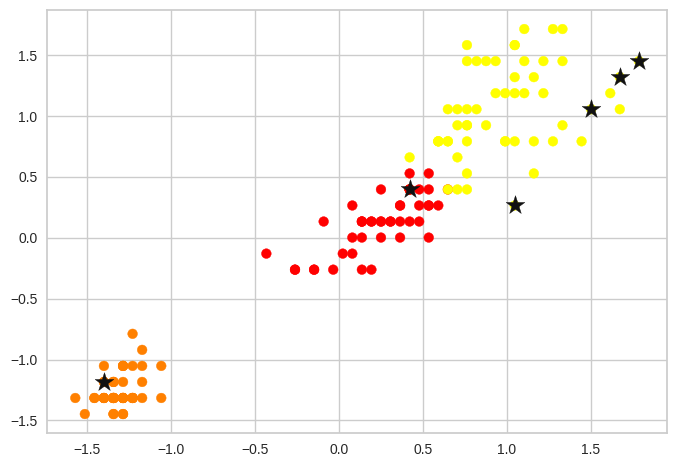

In [66]:
# Visualize anomalies
plt.scatter(X[:,2], X[:,3], c = predict, cmap= "autumn")
plt.scatter(anomalies[:,2], anomalies[:,3], c = 'k', marker="*", s=200)

In the above plot, as the actual training set is in 4D, we might find some ambiguity in visualizing anomalies in 2D.

Till now we have seen that just like k-means, the Gaussian Mixture algorithm requires us to specify the number of clusters. So, let's see how we can select it.

#### Selecting the Number of Clusters

With k-means, we could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes.

Instead, we can try to find the model that minimizes a theoretical information criterion, such as the **Bayesian information criterion (BIC)** or the **Akaike information criterion (AIC)**, defined as:

$$BIC = (log(m))p − 2log(\hat{L})$$

$$AIC = 2p − 2 log(\hat{L})$$

where,

$m$ is the number of instances

$p$ is the number of parameters learned by the model.

$L$ is the maximized value of the likelihood function of the model.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

To compute the BIC and AIC, we have the `bic()` and `aic()` methods:

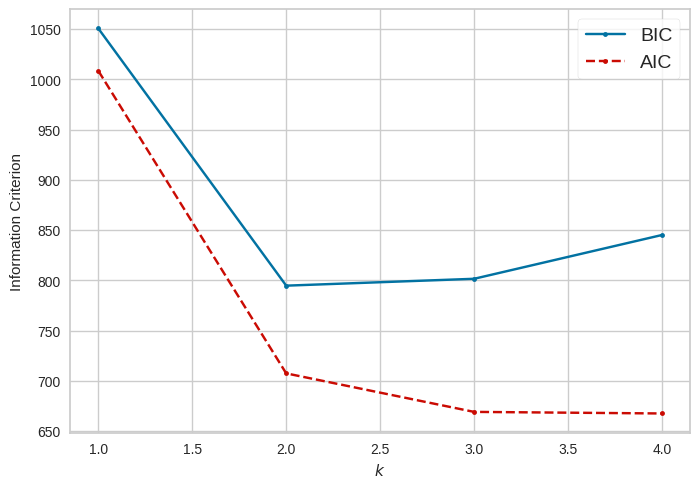

In [67]:
# Plot BIC and AIC by varying number of clusters
clusters = np.arange(1,5)
bic = []
aic = []
for c in clusters:
    gmm = GaussianMixture(n_components=c, n_init=10, random_state=123)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

plt.plot(clusters, bic, marker= '.', c='b', ls='-')
plt.plot(clusters, aic, marker= '.', c='r', ls='--')
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.legend(["BIC", "AIC"], prop=dict(size=14), frameon= True)
plt.show()

From the above plot we can see, both the BIC and the AIC are considerably lower when $k=3$, so it is most likely the best choice.

### Theory Questions

1. How would you define clustering? Can you name a few clustering algorithms?

  In Machine Learning, clustering is the unsupervised task of grouping similar
instances together. The notion of similarity depends on the task at hand: for
example, in some cases two nearby instances will be considered similar, while in
others similar instances may be far apart as long as they belong to the same
densely packed group. Popular clustering algorithms include k-means,
DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation,
and spectral clustering.

2. What are some of the main applications of clustering algorithms?

  The main applications of clustering algorithms include data analysis, customer
segmentation, recommender systems, search engines, image segmentation, semisupervised learning, dimensionality reduction, anomaly detection, and novelty
detection.

3. Describe two techniques to select the right number of clusters when using k-means.

  The elbow rule is a simple technique to select the number of clusters when using
k-means: just plot the inertia (the mean squared distance from each instance to
its nearest centroid) as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the “elbow”). This is generally close to the optimal number of clusters. Another approach is to plot the silhouette score as a function of the number of clusters. There will often be a peak, and the optimal number of clusters is generally nearby. The silhouette score is the mean silhouette coefficient over all instances. This coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, to –1 for instances that are very close to another cluster. You may also plot the silhouette diagrams and perform a more thorough analysis.

4. What is label propagation? Why would you implement it, and how?

  Labeling a dataset is costly and time-consuming. Therefore, it is common to have plenty of unlabeled instances, but few labeled instances. Label propagation is a technique that consists in copying some (or all) of the labels from the labeled instances to similar unlabeled instances. This can greatly extend the number of labeled instances, and thereby allow a supervised algorithm to reach better performance (this is a form of semi-supervised learning). One approach is to use a clustering algorithm such as k-means on all the instances, then for each cluster find the most common label or the label of the most representative instance (i.e., the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster.

5. Can you name two clustering algorithms that can scale to large datasets? And
two that look for regions of high density?

  k-means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look
for regions of high density.

6. Can you think of a use case where active learning would be useful? How would
you implement it?

  Active learning is useful whenever you have plenty of unlabeled instances but
labeling is costly. In this case (which is very common), rather than randomly
selecting instances to label, it is often preferable to perform active learning,
where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them. A common approach is
uncertainty sampling.

7. What is the difference between anomaly detection and novelty detection?

  Many people use the terms anomaly detection and novelty detection interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances. In novelty detection, the algorithm is trained on a dataset that is presumed to be “clean,” and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).

8. What is a Gaussian mixture? What tasks can you use it for?

  A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown. In other words, the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don’t know which cluster each instance belongs to. This model is useful for density estimation, clustering, and anomaly detection.

9. Can you name two techniques to find the right number of clusters when using a
Gaussian mixture model?

  One way to find the right number of clusters when using a Gaussian mixture
model is to plot the Bayesian information criterion (BIC) or the Akaike information criterion (AIC) as a function of the number of clusters, then choose the
number of clusters that minimizes the BIC or AIC. Another technique is to use a
Bayesian Gaussian mixture model, which automatically selects the number of
clusters.

### Please answer the questions below to complete the experiment:




In [68]:
#@title In which of the following algorithms cluster parameter initialization is required at beginning: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "k-means and gaussian mixtures" #@param ["", "k-means and dbscan", "dbscan and gaussian mixtures", "k-means and gaussian mixtures"]

In [69]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [70]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [71]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [72]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [73]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [74]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2408
Date of submission:  24 Jan 2025
Time of submission:  15:29:15
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
